In [1]:
from spreco.common import utils
from spreco.sampler import sampler
import numpy as np

2023-04-05 14:35:24.951647: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-05 14:35:30.421237: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
log_path   = '/home/gluo/workspace/nlinv_prior/logs/20230331-145248'
model_path = log_path+'/sde_abide_50'
config     = utils.load_config(log_path+'/config.yaml')
save_intermediate=False

N=100
sigma_type='quad'
target_snr=0.2
print("INFO -> sigma type: %s, sigma max: %.4f, simga min: %.4f, discrete steps: %d "%( sigma_type, config['sigma_max'], config['sigma_min'], N))

a_sampler = sampler(config, target_snr, sigma_type, N)
a_sampler.init_sampler(model_path, gpu_id='3')

INFO -> sigma type: quad, sigma max: 5.0000, simga min: 0.0010, discrete steps: 100 


2023-04-05 14:35:45.818015: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 79082 MB memory:  -> device: 0, name: A100-SXM-80GB, pci bus id: 0000:c1:00.0, compute capability: 8.0
2023-04-05 14:35:46.032317: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:353] MLIR V1 optimization pass is not enabled


INFO:tensorflow:Restoring parameters from /home/gluo/workspace/nlinv_prior/logs/20230331-145248/sde_abide_50


In [3]:
grid_x=5
grid_y=5
samples_n, samples  = a_sampler.pc_sampler(grid_x*grid_y, 3)

if save_intermediate:
    utils.writecfl('/scratch/gluo/pc_samples_mp', utils.float2cplx(np.array(samples)))
    utils.writecfl('/scratch/gluo/pc_samples_n_mp', utils.float2cplx(np.array(samples_n)))

images = samples_n[-1]
images = np.abs(utils.float2cplx(images))

  0%|          | 0/100 [00:00<?, ?it/s]2023-04-05 14:35:57.751128: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2023-04-05 14:36:01.825002: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
100%|██████████| 100/100 [05:04<00:00,  3.04s/it]


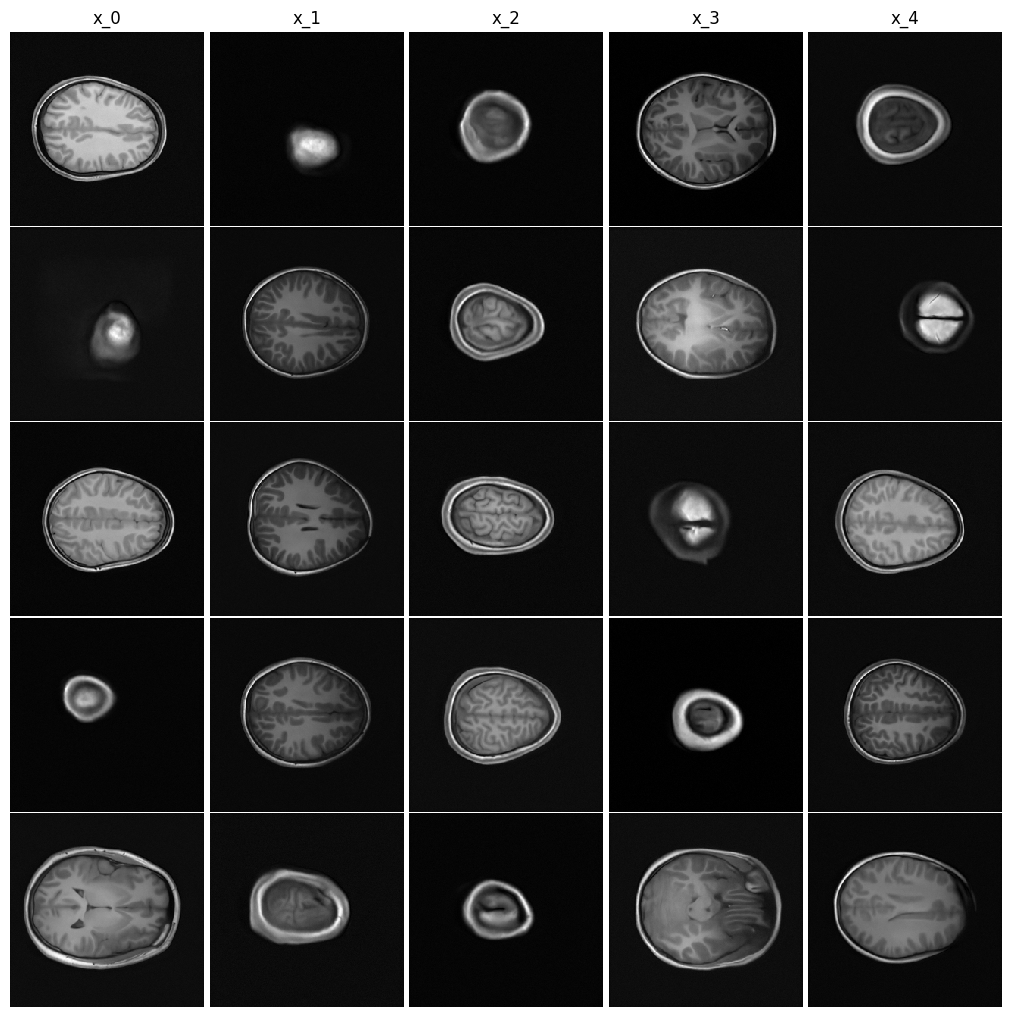

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from functools import partial

def subplot(ax, img, title, cmap, interpolation, vmin, vmax):
    ax.imshow(img, cmap=cmap, interpolation=interpolation, vmin=vmin, vmax=vmax)
    ax.set_title(title)
    ax.axis('off')


plot_params = {'cmap': 'gray', 'interpolation': 'none', 'vmin': 0}
axplot      = partial(subplot, **plot_params)

fig, axss = plt.subplots(grid_x, grid_y, figsize=(10, 10), gridspec_kw={'width_ratios': [1  for _ in range(grid_x)]})
for i in range(grid_x):
    for j in range(grid_y):
        if i==0:
            strs='x_%d'%j
        else:
            strs=''
        axplot(axss[i,j], images[i*grid_y+j], title=strs, vmax=np.max(images[i*grid_y+j]))
plt.tight_layout(pad=.1)

In [5]:
grid_x=5
grid_y=5
a_sampler.steps=3
samples_n, samples  = a_sampler.ancestral_sampler(grid_x*grid_y, 3)

if save_intermediate:
    utils.writecfl('/scratch/gluo/pc_samples_mp', utils.float2cplx(np.array(samples)))
    utils.writecfl('/scratch/gluo/pc_samples_n_mp', utils.float2cplx(np.array(samples_n)))

images = samples[-1]
images = np.abs(utils.float2cplx(images))


100%|██████████| 100/100 [04:31<00:00,  2.71s/it]


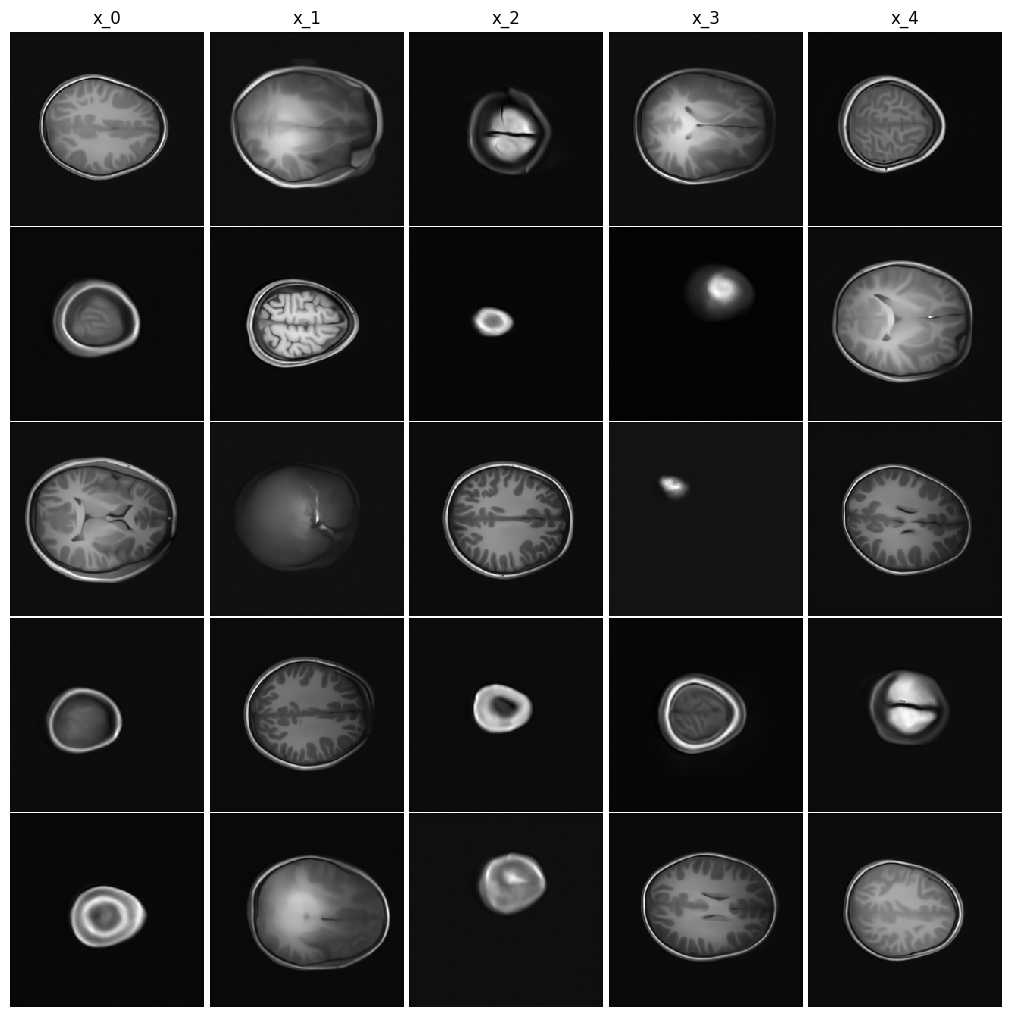

In [6]:
fig, axss = plt.subplots(grid_x, grid_y, figsize=(10, 10), gridspec_kw={'width_ratios': [1  for _ in range(grid_x)]})
for i in range(grid_x):
    for j in range(grid_y):
        if i==0:
            strs='x_%d'%j
        else:
            strs=''
        axplot(axss[i,j], images[i*grid_y+j], title=strs, vmax=np.max(images[i*grid_y+j]))
plt.tight_layout(pad=.1)